
# Business Analytics - Predicting price of depriciated Cars

***

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Overview of dataset with *pandas*](#0)<br>

1. [Exploratory Data Analysis](#2)<br>
1. [Feature Selection](#4) <br>
1. [Multiple Linear Regression](#6) <br>
1. [Prediction](#8) <br>

</div>


***

# Overview of dataset with *pandas* <a id="0"></a>




The first step is to import the packages: *pandas*, *numpy*, *matplotlib*, *sklearn* and *seaborn*.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
mpl.style.use(['seaborn'])
sns.set_theme(color_codes=True)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")
print('successful')

successful


Let's begin with reading our csv using *pandas*'s `pd.read_csv()` method then get an overview of the data by viewing size of the dataframe as well as a list of the column headers and the type of data stored within each columnm. We will also check for count of null entries in each column as below. 

In [ ]:
df = pd.read_csv('Cardata.csv')

print('Size of dataframe:')
print(df.shape)
print()

print('List of columns:')
df.columns = list(map(str, df.columns))
print(df.columns.tolist())
print()

print('Data type of each column:')
print(df.dtypes)
print()

print('Data type of all column headers:')
print(type(df.columns.tolist()))
print()

print('Data type of index header:')
print(type(df.index.tolist()))
print()

print('Count of null entries:')
print(df.isnull().sum())
print()
#print(df.isna().sum())

df.head(20)
#list of indices
#print(df.index)
#print(type(df.index))
#df.index.tolist()

#df.drop(['Key','Date','Weekend'], axis=1, inplace=True)

#df.set_index('Day_total', inplace=True)

Size of dataframe:
(4340, 8)

List of columns:
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']

Data type of each column:
name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

Data type of all column headers:
<class 'list'>

Data type of index header:
<class 'list'>

Count of null entries:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


The data seems to be free of null entries and good to use for further analysis.

Please note that the default type of instance variables `index` and `columns` are **NOT** `list`. To get the index and columns as lists, we can use the `.tolist()` method as above.
This will make it easier to identify certain columns and match the index column.

In [ ]:
#Create a new column by extracting the first word for each row in 'name'
df['make']=df['name'].str.extract(r"(\w+)", expand=True)

df['age'] = 2021-df['year']

# display updated DataFrame
df.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,make,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,14
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,14
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,9
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,7
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner,Maruti,14
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner,Hyundai,5
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner,Tata,7
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner,Hyundai,6
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,Maruti,4


In [ ]:
df.drop(labels='year',axis=1,inplace=True)
df.drop(labels='name',axis=1,inplace=True)

In [ ]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,make,age
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,14
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,14
2,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,9
3,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,7


Finally, let's drop owner as this does not have an impact on selling price. Then we will get a quick set of summary statistics for each column in our dataframe using the `.describe()` method.


In [ ]:
main_data = df.drop('owner', axis=1)
main_data

,selling_price,km_driven,fuel,seller_type,transmission,make,age
0,60000,70000,Petrol,Individual,Manual,Maruti,14
1,135000,50000,Petrol,Individual,Manual,Maruti,14
2,600000,100000,Diesel,Individual,Manual,Hyundai,9
3,250000,46000,Petrol,Individual,Manual,Datsun,4
4,450000,141000,Diesel,Individual,Manual,Honda,7
...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Hyundai,7
4336,409999,80000,Diesel,Individual,Manual,Hyundai,7
4337,110000,83000,Petrol,Individual,Manual,Maruti,12
4338,865000,90000,Diesel,Individual,Manual,Hyundai,5


In [ ]:
main_data.describe()

,selling_price,km_driven,age
count,4.340000e+03,4340.000000,4340.000000
mean,5.041273e+05,66215.777419,7.909217
std,5.785487e+05,46644.102194,4.215344
min,2.000000e+04,1.000000,1.000000
25%,2.087498e+05,35000.000000,5.000000
50%,3.500000e+05,60000.000000,7.000000
75%,6.000000e+05,90000.000000,10.000000
max,8.900000e+06,806599.000000,29.000000


***

# Exploratory Data Analysis


We want to discover the average price of each car make, by appending `.plot()` to the `main_data` dataframe as detailed below.

`price_by_make` illustrates the average price for each car make.


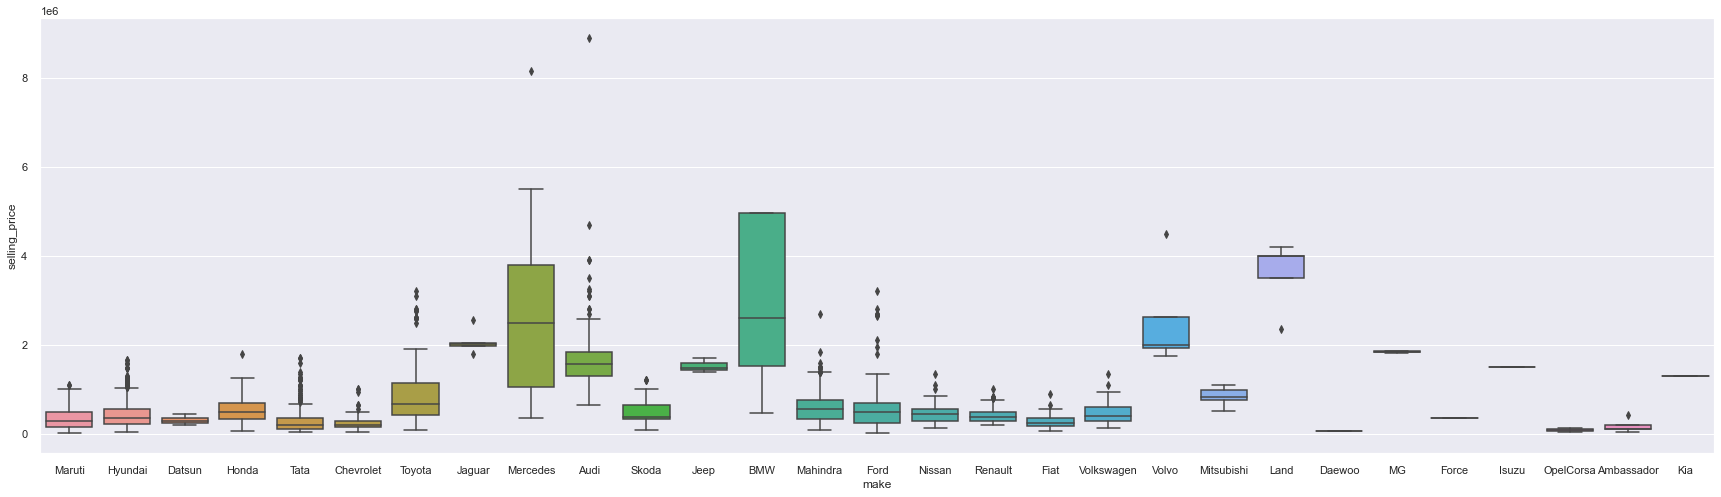

In [ ]:
sns.set(rc = {'figure.figsize':(30,8)})
ax = sns.boxplot(x="make", y="selling_price", data=main_data)

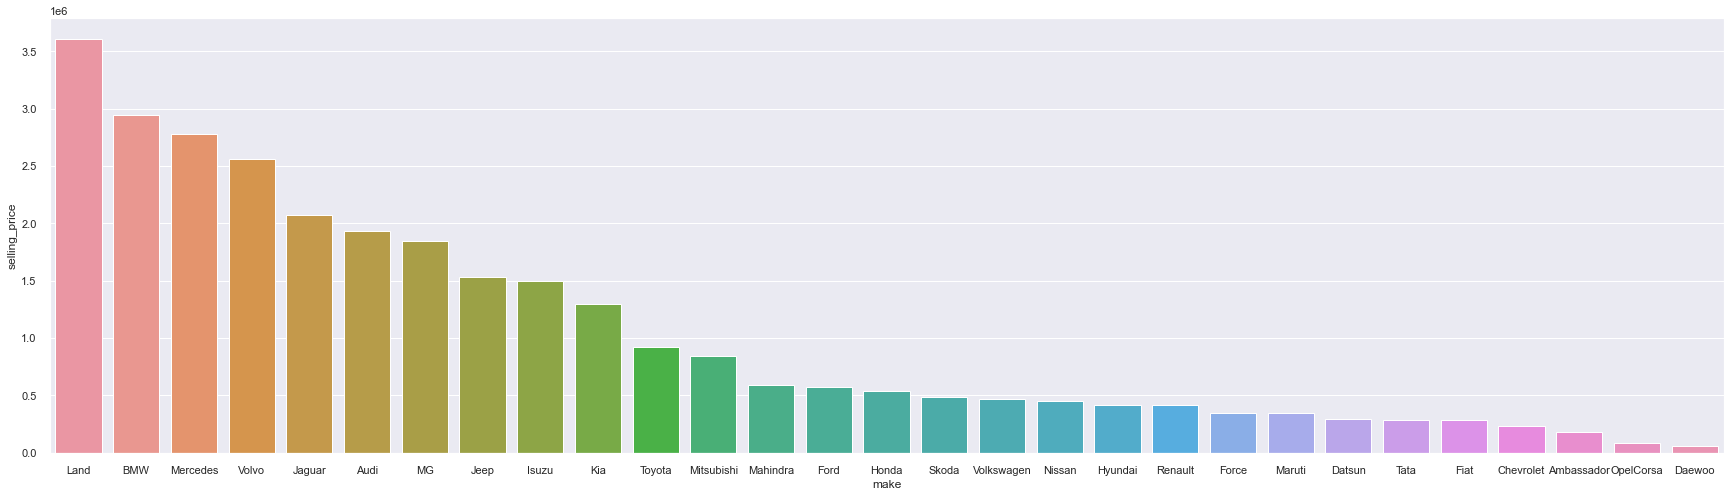

In [ ]:
price_by_make = main_data[['selling_price', 'make']]
price_by_make = price_by_make.groupby(by=['make'], as_index=False).mean().sort_values(by=['selling_price'], ascending=False)
sns.set(rc = {'figure.figsize':(30,8)})
ax = sns.barplot(x="make", y="selling_price", data=price_by_make, order=price_by_make['make'])
#How to sort the graph below by descending price

In [ ]:
price_by_make = price_by_make.groupby(by=['make'], as_index=False).mean().sort_values(by=['selling_price'], ascending=False)
price_by_make

,make,selling_price
15,Land,3.609800e+06
2,BMW,2.945385e+06
19,Mercedes,2.776657e+06
28,Volvo,2.556250e+06
12,Jaguar,2.069166e+06
1,Audi,1.931633e+06
16,MG,1.842500e+06
13,Jeep,1.530000e+06
11,Isuzu,1.500000e+06
14,Kia,1.300000e+06


We want to get a rough idea of the relationship betweeen selling_price and the other variables, which we can do by scatter plots of selling_price on the y axis and each variable on the x axis, for each scatter plot.

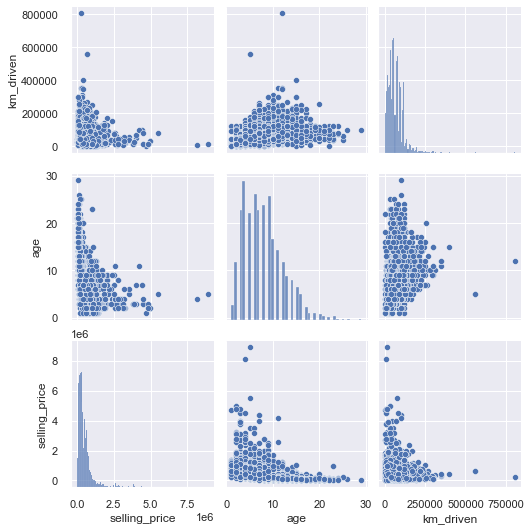

In [ ]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.pairplot(main_data,
             x_vars=['selling_price','age', 'km_driven'],
             y_vars=['km_driven', 'age', 'selling_price'],
             #corner=True
             )

We can see from the above, that price decreases with age and km_driven.

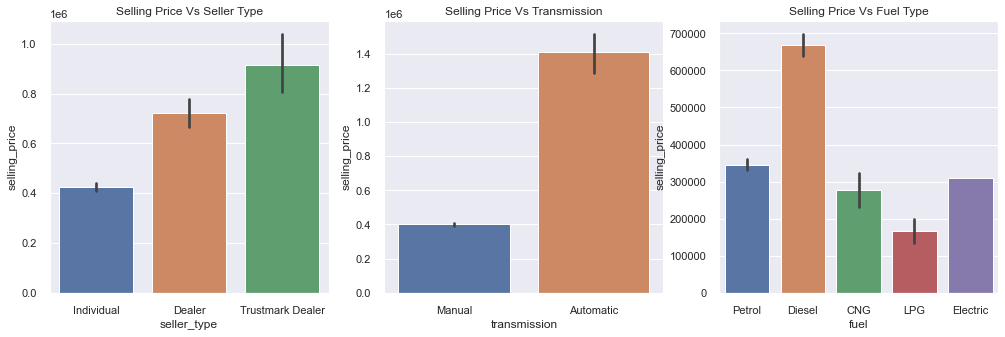

In [ ]:
#Seller Type, Transmission and Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df['seller_type'], df['selling_price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(df['transmission'],df['selling_price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(df['fuel'],df['selling_price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

Selling price of cars seems to have higher prices when sold by Trustmark Dealers as compared to Dealers or Individuals.
Selling price is higher for automatic cars.
Selling price is higher for Diesel than other fuel types.

In [ ]:
main_data.head()

,selling_price,km_driven,fuel,seller_type,transmission,make,age
0,60000,70000,Petrol,Individual,Manual,Maruti,14
1,135000,50000,Petrol,Individual,Manual,Maruti,14
2,600000,100000,Diesel,Individual,Manual,Hyundai,9
3,250000,46000,Petrol,Individual,Manual,Datsun,4
4,450000,141000,Diesel,Individual,Manual,Honda,7


In [ ]:
#main_data = main_data.drop(labels='make', axis=1)
#
#

In order to understand which variables have a high impact on selling_price, we will look at correlation of each variable with selling_price.

In [ ]:
main_data.corr()

,selling_price,km_driven,age
selling_price,1.000000,-0.192289,-0.413922
km_driven,-0.192289,1.000000,0.419688
age,-0.413922,0.419688,1.000000


<AxesSubplot:>

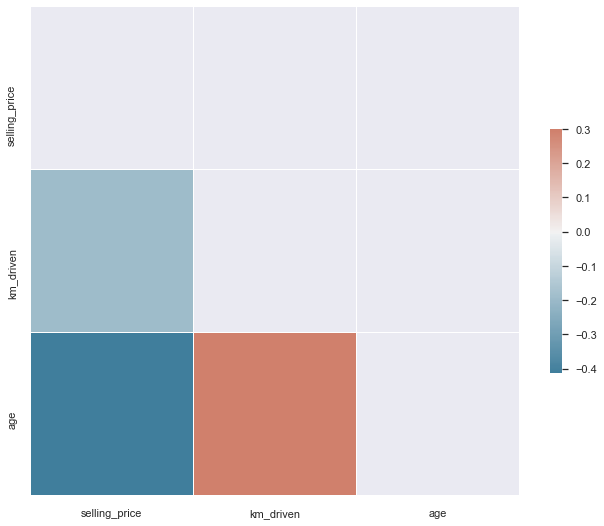

In [ ]:
corr=main_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the above visualisation, we can see that all variables in our dataset are correlated with selling_price and will therefore have an impact on selling_price.

Transmission and year have the highest correlation with selling_price and both show strong positive correlation.

Km_driven, fuel and seller_type show moderate correlation with selling_price.

In the next section, we will look at the association of each variable type with selling price in more detail.

***

# Feature Selection

Dealing with categorical variables.

In [ ]:
clean_data = pd.get_dummies(main_data)
clean_data.head()

,selling_price,km_driven,age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,...,make_Mercedes,make_Mitsubishi,make_Nissan,make_OpelCorsa,make_Renault,make_Skoda,make_Tata,make_Toyota,make_Volkswagen,make_Volvo
0,60000,70000,14,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,135000,50000,14,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,600000,100000,9,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,250000,46000,4,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,450000,141000,7,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Feature selected models improve accuracy and speed, therefore, we will check multicollinearity using VIF in order to drop features that are multicollinear.

We will also carry out F-regression tests on each of the variables to evaluate their signifiance towards predicting the target variables.

In [ ]:
#List of columns for feature selection.
clean_data.columns

Index(['selling_price', 'km_driven', 'age', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'make_Ambassador',
       'make_Audi', 'make_BMW', 'make_Chevrolet', 'make_Daewoo', 'make_Datsun',
       'make_Fiat', 'make_Force', 'make_Ford', 'make_Honda', 'make_Hyundai',
       'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Land',
       'make_MG', 'make_Mahindra', 'make_Maruti', 'make_Mercedes',
       'make_Mitsubishi', 'make_Nissan', 'make_OpelCorsa', 'make_Renault',
       'make_Skoda', 'make_Tata', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['km_driven', 'age', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'make_Ambassador',
       'make_Audi', 'make_BMW', 'make_Chevrolet', 'make_Daewoo', 'make_Datsun',
       'make_Fiat', 'make_Force', 'make_Ford', 'make_Honda', 'make_Hyundai',
       'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Land',
       'make_MG', 'make_Mahindra', 'make_Maruti', 'make_Mercedes',
       'make_Mitsubishi', 'make_Nissan', 'make_OpelCorsa', 'make_Renault',
       'make_Skoda', 'make_Tata', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.502534,km_driven
1,1.393223,age
2,inf,fuel_CNG
3,inf,fuel_Diesel
4,inf,fuel_Electric
5,inf,fuel_LPG
6,inf,fuel_Petrol
7,inf,seller_type_Dealer
8,inf,seller_type_Individual
9,inf,seller_type_Trustmark Dealer


This shows a perfect correlation between two independent variables. In the case of perfect correlation, we get R2 = 1, which lead to 1/(1-R2) infinity. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.

We can re-run with selected variables to see if VIF is below 5. If VIF is above 5, it means the variable is showing high multi-collinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['km_driven', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
                        'seller_type_Individual','seller_type_Trustmark Dealer','transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.076349,km_driven
1,1.000415,fuel_Electric
2,1.012338,fuel_LPG
3,1.955860,fuel_Petrol
4,4.250722,seller_type_Individual
5,1.072862,seller_type_Trustmark Dealer
6,5.664088,transmission_Manual


VIF is close to or below 5 for our selected variables.

In [ ]:
#
#
#
#data_no_multicolinearity = clean_data[['selling_price','km_driven', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
#                        'seller_type_Individual','seller_type_Trustmark Dealer','transmission_Manual']]
#
#
#

In [ ]:
data_no_multicolinearity = clean_data

In [ ]:
clean_data.columns

Index(['selling_price', 'km_driven', 'age', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'make_Ambassador',
       'make_Audi', 'make_BMW', 'make_Chevrolet', 'make_Daewoo', 'make_Datsun',
       'make_Fiat', 'make_Force', 'make_Ford', 'make_Honda', 'make_Hyundai',
       'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Land',
       'make_MG', 'make_Mahindra', 'make_Maruti', 'make_Mercedes',
       'make_Mitsubishi', 'make_Nissan', 'make_OpelCorsa', 'make_Renault',
       'make_Skoda', 'make_Tata', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo'],
      dtype='object')

Let's plot a heatmap showing correlation of the variables with each other.

<AxesSubplot:>

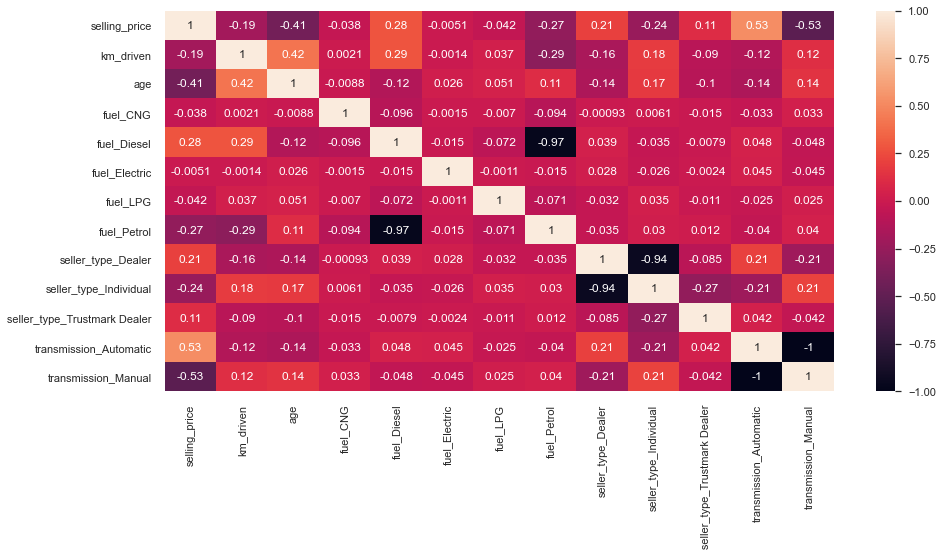

In [ ]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity[['selling_price', 'km_driven', 'age', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual']].corr(), annot=True)

We will calculate p-values for our features to determine if they are useful or not.
If p-value>0.05, then we can discard the variable.

In [ ]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('selling_price',axis=1)
y = data_no_multicolinearity['selling_price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

#Round to 3 decimal places
p_values.round(3)


array([0.   , 0.   , 0.013, 0.   , 0.737, 0.005, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.262, 0.   , 0.   , 0.   , 0.443, 0.029,
       0.02 , 0.785, 0.066, 0.336, 0.   , 0.085, 0.   , 0.002, 0.169,
       0.   , 0.001, 0.004, 0.   , 0.   , 0.155, 0.45 , 0.31 , 0.072,
       0.839, 0.   , 0.   , 0.549, 0.   ])

In [ ]:
#List of columns for creating model summary
clean_data.columns

Index(['selling_price', 'km_driven', 'age', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'make_Ambassador',
       'make_Audi', 'make_BMW', 'make_Chevrolet', 'make_Daewoo', 'make_Datsun',
       'make_Fiat', 'make_Force', 'make_Ford', 'make_Honda', 'make_Hyundai',
       'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Land',
       'make_MG', 'make_Mahindra', 'make_Maruti', 'make_Mercedes',
       'make_Mitsubishi', 'make_Nissan', 'make_OpelCorsa', 'make_Renault',
       'make_Skoda', 'make_Tata', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo'],
      dtype='object')

In [ ]:
# Creating summary table
model_summry = pd.DataFrame(data=['km_driven', 'age', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'make_Ambassador',
       'make_Audi', 'make_BMW', 'make_Chevrolet', 'make_Daewoo', 'make_Datsun',
       'make_Fiat', 'make_Force', 'make_Ford', 'make_Honda', 'make_Hyundai',
       'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Land',
       'make_MG', 'make_Mahindra', 'make_Maruti', 'make_Mercedes',
       'make_Mitsubishi', 'make_Nissan', 'make_OpelCorsa', 'make_Renault',
       'make_Skoda', 'make_Tata', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry.head(50)

,Features,p-values
0,km_driven,0.000
1,age,0.000
2,fuel_CNG,0.013
3,fuel_Diesel,0.000
4,fuel_Electric,0.737
5,fuel_LPG,0.005
6,fuel_Petrol,0.000
7,seller_type_Dealer,0.000
8,seller_type_Individual,0.000
9,seller_type_Trustmark Dealer,0.000


Apart from some of the makes, fuel_Electric and fuel_CNG are the only variables with high p-values.
Since p-value of these features is greater than 0.05, these variable show insignificant contribution towards the target variable.
We will only discard some of the makes in order to reduce the number of features and omit insignificant variables, however, we will retain fuel types so that our model encompasses most of the data.

We can also use feature importance to rank the features in order of importance.
Feature importance tells us how important or relevant each feature is towards our Target variable, by means of a score. A higher score indicates more importance/relevance.


In [ ]:
clean_data.columns

Index(['selling_price', 'km_driven', 'age', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'make_Ambassador',
       'make_Audi', 'make_BMW', 'make_Chevrolet', 'make_Daewoo', 'make_Datsun',
       'make_Fiat', 'make_Force', 'make_Ford', 'make_Honda', 'make_Hyundai',
       'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Land',
       'make_MG', 'make_Mahindra', 'make_Maruti', 'make_Mercedes',
       'make_Mitsubishi', 'make_Nissan', 'make_OpelCorsa', 'make_Renault',
       'make_Skoda', 'make_Tata', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo'],
      dtype='object')

In [ ]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

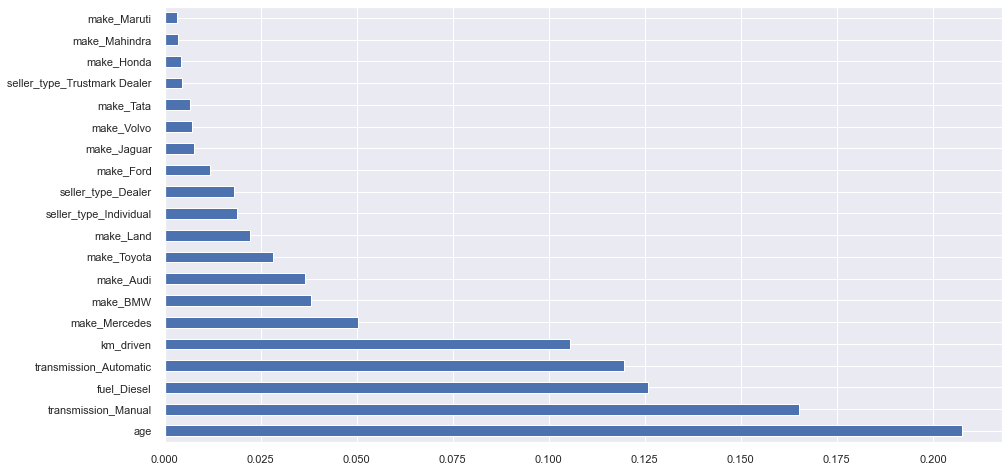

In [ ]:
# plot graph of 20 most important features for better visualisation
plt.figure(figsize=[15,8])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
print(feat_importances.sort_values(ascending=False))

age                             2.075575e-01
transmission_Manual             1.651391e-01
fuel_Diesel                     1.257906e-01
transmission_Automatic          1.195831e-01
km_driven                       1.055678e-01
make_Mercedes                   5.034011e-02
make_BMW                        3.800907e-02
make_Audi                       3.655513e-02
make_Toyota                     2.817257e-02
make_Land                       2.215996e-02
seller_type_Individual          1.872235e-02
seller_type_Dealer              1.792446e-02
make_Ford                       1.177222e-02
make_Jaguar                     7.660905e-03
make_Volvo                      7.035377e-03
make_Tata                       6.591833e-03
seller_type_Trustmark Dealer    4.480772e-03
make_Honda                      4.140972e-03
make_Mahindra                   3.529608e-03
make_Maruti                     3.302783e-03
make_Hyundai                    3.205056e-03
make_Chevrolet                  2.229638e-03
make_MG   

As we can see above, most of the least important features are the make features, which agrees with our p-values earlier.

We will therefore drop all makes not in the top 20 most important features in order to reduce number of features and omit from retaining insignificant features.

In [ ]:
data_no_multicolinearity.columns


Index(['selling_price', 'km_driven', 'age', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'make_Ambassador',
       'make_Audi', 'make_BMW', 'make_Chevrolet', 'make_Daewoo', 'make_Datsun',
       'make_Fiat', 'make_Force', 'make_Ford', 'make_Honda', 'make_Hyundai',
       'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Land',
       'make_MG', 'make_Mahindra', 'make_Maruti', 'make_Mercedes',
       'make_Mitsubishi', 'make_Nissan', 'make_OpelCorsa', 'make_Renault',
       'make_Skoda', 'make_Tata', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo'],
      dtype='object')

In [ ]:
# Selecting useful features.
final_df = data_no_multicolinearity.drop(['make_Ambassador',
       'make_Chevrolet', 'make_Daewoo', 'make_Datsun',
       'make_Fiat', 'make_Force', 'make_Hyundai',
       'make_Isuzu', 'make_Jeep', 'make_Kia',
       'make_MG', 'make_Mahindra', 'make_Maruti',
       'make_Mitsubishi', 'make_Nissan', 'make_OpelCorsa', 'make_Renault',
       'make_Skoda', 'make_Volkswagen',
       'make_Volvo'], axis=1)
final_df.head()

,selling_price,km_driven,age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,...,transmission_Manual,make_Audi,make_BMW,make_Ford,make_Honda,make_Jaguar,make_Land,make_Mercedes,make_Tata,make_Toyota
0,60000,70000,14,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,135000,50000,14,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,600000,100000,9,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,250000,46000,4,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,450000,141000,7,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


***

# Multiple Linear Regression

Declaring dependent and independent variable.

In [ ]:
X = final_df.drop('selling_price', axis=1)
y = final_df['selling_price']

Splitting data into train/test sets.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=365)

Linear Regression Model

In [ ]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)

R_squared : 0.5441327213650642


***

# Conclusion

In [ ]:
r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)

R_squared : 0.5441327213650642


Any R2 value less than 1.0 indicates that at least some variability in the data cannot be accounted for by the model (e.g., an R2 of 0.5 indicates that 50% of the variability in the outcome data cannot be explained by the model).

Generally, an R-Squared above 0.6 makes a model worth attention, though there are other things to consider: Any field that attempts to predict human behaviour, such as psychology, typically has R-squared values lower than 0.5.

In this case, we can conclude that our model could be helpful in estimating selling price of cars. This can be verified by plotting the actual and predicted results on the same plot, as below.

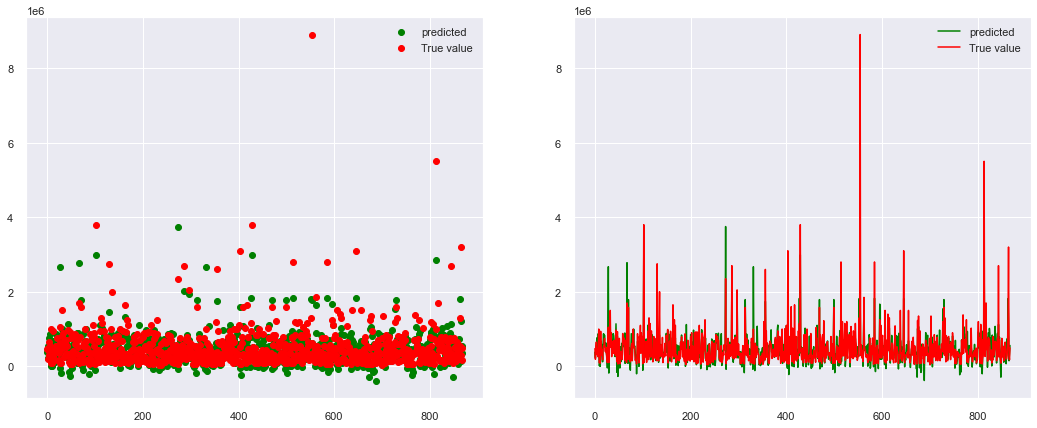

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(range(0,len(x_test)), pred,color="green",label="predicted")
plt.scatter(range(0,len(x_test)), y_test,color="red",label="True value")
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(range(0,len(x_test)), pred,color="green",label="predicted")
plt.plot(range(0,len(x_test)), y_test,color="red",label="True value")
plt.legend()
plt.show()

It seems our model predicts accurately for most cars but is unable to predict for high priced cars, which agrees with the meaning of R^2=0.55.
The high priced cars could be seen as outliers in the data.

Let's try to make a prediction with our model.

In [ ]:
X

,km_driven,age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,...,transmission_Manual,make_Audi,make_BMW,make_Ford,make_Honda,make_Jaguar,make_Land,make_Mercedes,make_Tata,make_Toyota
0,70000,14,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,50000,14,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,100000,9,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,46000,4,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,141000,7,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,80000,7,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4336,80000,7,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4337,83000,12,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4338,90000,5,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
lr.predict(x_test)

array([ 3.79065957e+05,  2.28758407e+05,  5.39549212e+05,  5.57598872e+05,
        7.62911764e+05,  4.33512399e+05,  2.66419841e+05,  8.76099708e+05,
        4.93142380e+05,  1.91036715e+04,  4.86731606e+04, -1.20533546e+03,
        2.49067414e+05,  6.76174397e+05,  2.96151271e+05,  5.85681357e+05,
        1.21038342e+05,  5.76910743e+05,  8.76099708e+05,  5.41438843e+05,
        8.35098242e+05,  5.14460893e+05,  5.14619924e+05,  6.27786375e+05,
        3.49732179e+05,  2.53010012e+05, -4.29922557e+04,  6.89324755e+05,
        2.67274911e+06, -1.81006327e+05,  5.60882990e+05,  1.00244912e+06,
        1.00688036e+06,  5.93769190e+05,  8.96378169e+05,  5.52877373e+05,
        4.56389089e+05,  4.88319143e+05,  8.77482033e+05,  8.32142519e+05,
        6.17929879e+05,  4.28584151e+05,  2.62087607e+05,  7.38246381e+05,
        1.14034958e+06,  5.48338390e+05, -1.61293334e+05,  8.00004490e+05,
       -2.70906823e+05,  4.39514948e+05,  5.11897105e+05,  4.88603398e+05,
       -4.62495239e+04,  